# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [3]:
sinasc_1 = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'munResNome']]
sinasc_1.groupby('munResNome').aggregate([('média', 'min')])

,IDADEMAE,IDADEPAI
,média,média
munResNome,,
Alta Floresta D'Oeste,14,17.0
Alto Alegre dos Parecis,14,16.0
Alto Paraíso,11,21.0
Alvorada D'Oeste,15,17.0
Ariquemes,13,20.0
Buritis,14,18.0
Cabixi,13,19.0
Cacaulândia,16,28.0


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [4]:
sinasc_2 = sinasc_raw[['SEXO', 'ESCMAE', 'DTNASC', 'PESO']]
sinasc_weigth = sinasc_2.loc[sinasc_2['DTNASC'] == '2019-08-23'].copy()
sinasc_weigth.drop(columns='DTNASC', inplace=True)
sinasc_weigth.groupby(['ESCMAE', 'SEXO']).mean()

PESO
ESCMAE          SEXO                  
1 a 3 anos      Masculino  2835.000000
12 anos ou mais Feminino   3170.000000
                Masculino  3366.500000
4 a 7 anos      Feminino   3195.714286
                Masculino  3288.750000
8 a 11 anos     Feminino   3159.913043
                Masculino  3308.560000

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [5]:
sinasc_3 = sinasc_raw[['munResNome', 'QTDPARTCES','QTDPARTNOR', 'IDADEMAE', 'IDADEPAI']]

#Agregrando os tipos de parto
sinasc_3['PARTOS'] = sinasc_3['QTDPARTCES'] + sinasc_3['QTDPARTNOR']
sinasc_3.drop(columns=['QTDPARTCES', 'QTDPARTNOR'], inplace=True)


In [6]:
# Encontra a cidade com menos nascimentos
menos_nasc = sinasc_3.loc[sinasc_3['PARTOS'] == sinasc_3['PARTOS'].agg('min'), 'munResNome'].values[0]
sinasc_3.loc[sinasc_3['munResNome'] == menos_nasc].groupby('munResNome').agg({'IDADEMAE': ['min', 'max', 'mean'], 'IDADEPAI': ['min', 'max', 'mean']})

IDADEMAE                IDADEPAI                 
                           min max       mean      min   max       mean
munResNome                                                             
Alta Floresta D'Oeste       14  53  25.991826     17.0  58.0  29.548701

### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [7]:
sinasc_4 = sinasc_raw[['QTDFILVIVO' , 'IDADEPAI', 'QTDPARTCES', 'QTDPARTNOR', 'munResNome', 'DTNASC']]
sinasc_4['DTNASC'] = pd.to_datetime(sinasc_4['DTNASC'])
sinasc_4 = sinasc_4.loc[(sinasc_4['DTNASC'] >= '2019-03-01') & (sinasc_4['DTNASC'] <= '2019-03-31')].copy()
sinasc_4.drop(columns='DTNASC', inplace=True)

#Agregrando os tipos de parto
sinasc_4['PARTOS'] = sinasc_4['QTDPARTCES'] + sinasc_4['QTDPARTNOR']
sinasc_4.drop(columns=['QTDPARTCES', 'QTDPARTNOR'], inplace=True)

# Encontra a cidade com mais nascimentos
mais_partos = sinasc_4.loc[sinasc_4['PARTOS'] == sinasc_4['PARTOS'].agg('max'), 'munResNome'].values[0]
sinasc_4 = sinasc_4.loc[sinasc_4['munResNome'] == mais_partos].copy()
sinasc_4.loc[sinasc_4['munResNome'] == menos_nasc].groupby('munResNome').agg({'IDADEPAI': ['min', 'max', 'mean'], 'QTDFILVIVO': ['min', 'max', 'mean']})

Empty DataFrame
Columns: [(IDADEPAI, min), (IDADEPAI, max), (IDADEPAI, mean), (QTDFILVIVO, min), (QTDFILVIVO, max), (QTDFILVIVO, mean)]
Index: []

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [8]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResUf       object
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Length: 69, dtype: object

In [9]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia


## Qual a proporção entre tipos de parto?

Nesse dataset temos a informação de como foi o parto, se foi normal ou cesárea. Qual a proporção entre esses tipos de parto? 

In [10]:
# Proporção de nascimentos por tipo de parto
qtd_partos = sinasc_raw['PARTO'].value_counts()

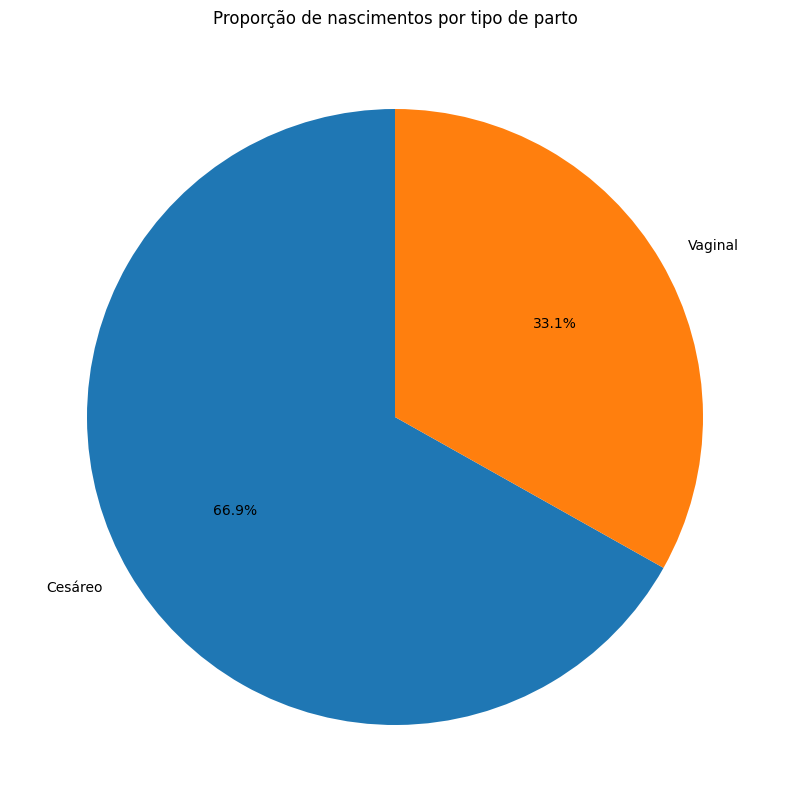

In [11]:
#Pie chart com qtd_partos
plt.figure(figsize=(10,10))
plt.pie(qtd_partos, labels=qtd_partos.index, autopct='%1.1f%%', shadow=False, startangle=90)
plt.title('Proporção de nascimentos por tipo de parto')
plt.show()


Dentro dos dados analisados, a há muito mais cesáreas do que partos normais.

## Há alguma relação entre a escolaridade da mãe e a escolha entre cesárea e parto normal?
Dado que a proporção de cesáreas no dataset é bem alta, a escolaridade da mãe influencia de alguma forma nessa escolha? Mães com um nível de escolaridade mais alto optam menos por cesárea?

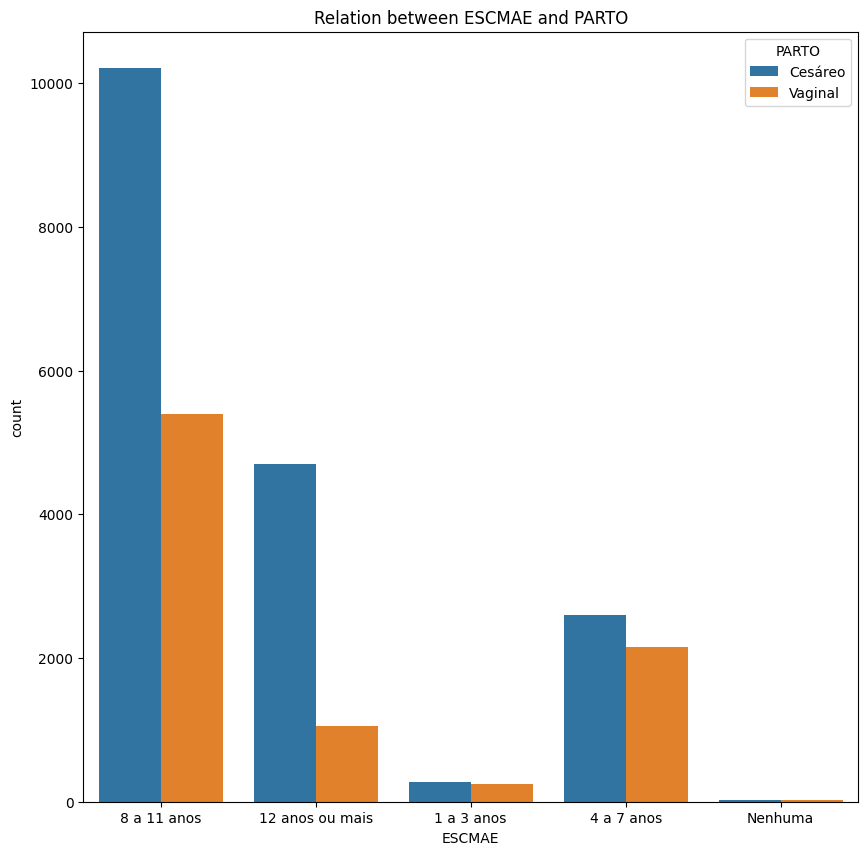

In [12]:
# Relação entre a escolaridade da mãe e o tipo de parto
plt.figure(figsize=(10,10))
sns.countplot(x='ESCMAE', hue='PARTO', data=sinasc_raw)
plt.title('Relation between ESCMAE and PARTO')
plt.show()

A escolaridade da mãe parece não influenciar na escolha do tipo de parto. A proporção de cesáreas é bem alta em todos os níveis de escolaridade – embora se observe que essa proporção diminui na faixa de 1 a 3 anos.